<h1 style="text-align:center">Bode Plot Basics</h1>
<h3 style="text-align:center">MCHE 474: Control Systems</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_DirectForce_Horiz.png" alt="A Mass-Spring-Damper System" width=50%></a><br>
    <strong> Figure 1: A Mass-Spring-Damper System </strong>
</p>

This notebook examines the frequency response of a mass-spring-damper system like the one shown in Figure 1 using the [Bode Plot](https://en.wikipedia.org/wiki/Bode_plot). We'll use some of the core functionality of the [Control System Library](http://python-control.readthedocs.io/en/latest/index.html) to do so. 

The equation of motion for the system is:

<!-- the \quad commmand just adds a space in the math mode -->
$ \quad m \ddot{x} + c \dot{x} + kx = f $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$ \quad \ddot{x} + 2\zeta\omega_n \dot{x} + \omega_n^2x = \frac{f}{m}$

Using this form, we can write the Laplace Transform of the equation of motion:

$ \quad \left(s^2 + 2\zeta\omega_n s + \omega_n^2\right)X = \frac{1}{m}F $

Then, we can use that to generate the transfer function for this system:

$ \quad \frac{X}{F} = \frac{1/m}{s^2 + 2\zeta\omega_n s + \omega_n^2} $

In [1]:
import numpy as np              # Grab all of the NumPy functions with namespace np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline

In [3]:
# Import the plotting functions 
import matplotlib.pyplot as plt

In [4]:
# import the Control Systems Library 
import control

In [5]:
# Define the System Parameters
m = 1.0                 # kg
k = (2.0 * np.pi)**2    # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k / m)     # Natural Frequency (rad/s)

z = 0.1                # Define a desired damping ratio
c = 2 * z * wn * m      # calculate the damping coeff. to create it (N/(m/s))

Now, we can define the system to examine with the Bode plot. We define the numerator and denominator of the transfer function, then using `control.tf()` to create the system.

In [6]:
num = [1/m]
den = [1, 2 * z * wn, wn**2]

sys = control.tf(num, den)

In [7]:
magnitude, phase, frequency = control.bode(sys, omega=np.linspace(0,100,10001), Plot=False) # we use Plot=False because we'll plot it prettier outselve)

# We want the magnitude plotted in dB to match Bode Plot standards
mag_dB = 20 * np.log10(magnitude)

# We want the frequency plotted in Hz
frequency_Hz = frequency / (2 * np.pi)

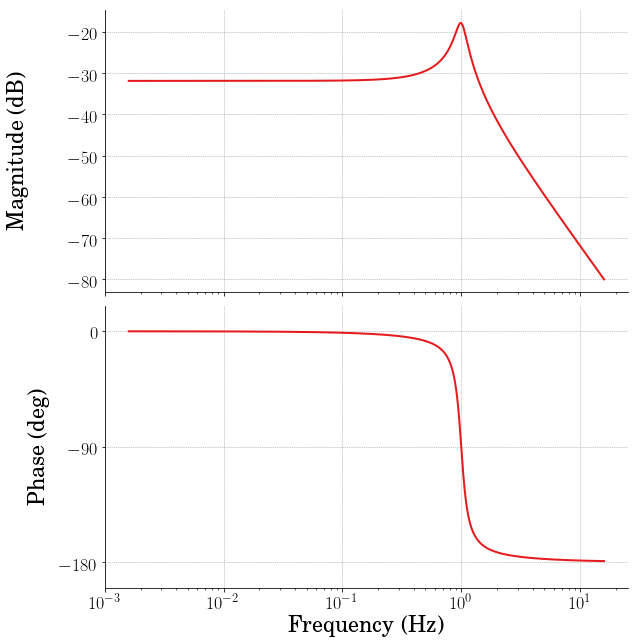

In [8]:
# Let's plot the magnitude and phase as subplots, to make it easier to compare

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax1.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax1.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

plt.xlabel(r'Frequency (Hz)',family='serif',fontsize=22,weight='bold',labelpad=5)
# plt.xticks([0,1],['0','$\Omega = 1$'])

# Magnitude plot - format each magnitude as 20 * log(mag)
ax1.set_ylabel(r'Magnitude (dB)',family='serif',fontsize=22,weight='bold',labelpad=40)
ax1.semilogx(frequency_Hz, mag_dB, linewidth=2, label=r'$\zeta$ = 0.1')
# ax1.set_ylim(0.0,7.0)
# ax1.set_yticks([0,1,2,3,4,5],['0', '1'])

# ax1.leg = ax1.legend(loc='upper right', fancybox=True)
# ltext  = ax1.leg.get_texts()
# plt.setp(ltext,family='Serif',fontsize=16)

# Phase plot 
ax2.set_ylabel('Phase (deg)',family='serif',fontsize=22,weight='bold',labelpad=10)
# ax2.semilogx(wnorm,TFnorm_phase*180/np.pi,linewidth=2)
ax2.semilogx(frequency_Hz, phase, linewidth=2, label=r'$\zeta$ = 0.0')
ax2.set_ylim(-200.0,20.0,)
ax2.set_yticks([0, -90, -180])

# Uncomment below to place a legend on the lower subplot too
# ax2.leg = ax2.legend(loc='upper right', fancybox=True)
# ltext  = ax2.leg.get_texts()
# plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MassSpring_SeismicTF.pdf',dpi=300)

fig.set_size_inches(9,9) # Resize the figure for better display in the notebook

## Analysis for Different Damping Ratios
We can repeat this for a variety of damping ratios to compare the Bode Plots. We'll write this an array/list of tranfer functions and use indices to access the particular responses that we want.

In [9]:
damping_ratios = [0.01, 0.1, 0.2, 0.4]

# Now define some arrays, filled with zeros for now, to hold the various system information
num = np.zeros_like(damping_ratios)
den = np.zeros_like(damping_ratios)
sys = []

freq_range = np.linspace(0,100,10001)
magnitude = np.empty((len(freq_range), len(damping_ratios)))
phase = np.empty((len(freq_range), len(damping_ratios)))
frequency = np.empty((len(freq_range), len(damping_ratios)))
mag_dB = np.empty((len(freq_range), len(damping_ratios)))
frequency_Hz = np.empty((len(freq_range), len(damping_ratios)))

for index, z in enumerate(damping_ratios):
    num = [1/m]
    den = [1, 2 * z * wn, wn**2]

    sys.append(control.tf(num, den))
    
    magnitude[:,index], phase[:,index], frequency[:,index] = control.bode(sys[index], omega=freq_range, Plot=False) # we use Plot=False because we'll plot it prettier outselve)

    # We want the magnitude plotted in dB to match Bode Plot standards
    mag_dB[:,index] = 20 * np.log10(magnitude[:, index])

    # We want the frequency plotted in Hz
    frequency_Hz[:,index] = frequency[:,index] / (2 * np.pi)

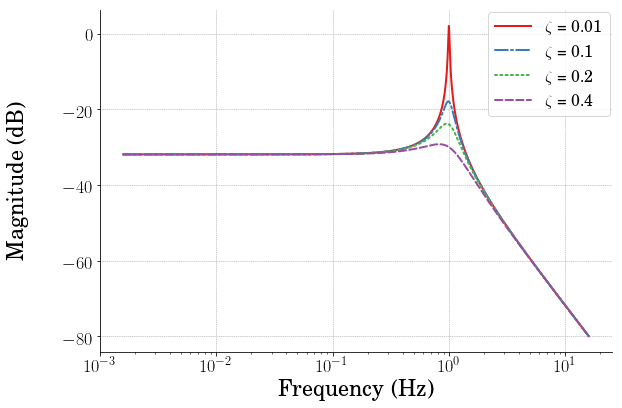

In [10]:
# Let's plot the magnitude (normlized by k G(Omega))

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Frequency (Hz)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'Magnitude (dB)',family='Serif',fontsize=22,weight='bold',labelpad=35)

plt.semilogx(frequency_Hz[:,0], mag_dB[:,0], linewidth=2, label=r'$\zeta$ = 0.01')
plt.semilogx(frequency_Hz[:,1], mag_dB[:,1], linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.1')
plt.semilogx(frequency_Hz[:,2], mag_dB[:,2], linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
plt.semilogx(frequency_Hz[:,3], mag_dB[:,3], linewidth=2, linestyle = '--',label=r'$\zeta$ = 0.4')

# plt.xlim(0,5)
# plt.ylim(0,7)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# save the figure as a high-res pdf in the current folder
# plt.savefig('Forced_Freq_Resp_mag.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

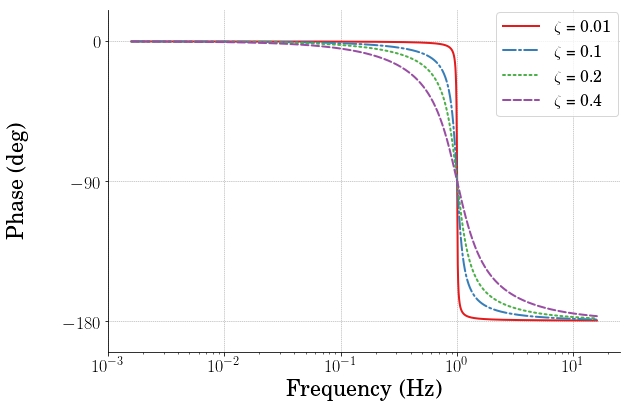

In [11]:
# Now let's plot the phase

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Frequency (Hz)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'Phase (deg)',family='Serif',fontsize=22,weight='bold',labelpad=35)

plt.semilogx(frequency_Hz[:,0], phase[:,0], linewidth=2, label=r'$\zeta$ = 0.01')
plt.semilogx(frequency_Hz[:,1], phase[:,1], linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.1')
plt.semilogx(frequency_Hz[:,2], phase[:,2], linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
plt.semilogx(frequency_Hz[:,3], phase[:,3], linewidth=2, linestyle = '--',label=r'$\zeta$ = 0.4')

plt.ylim(-200.0, 20.0)
plt.yticks([0, -90, -180])

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# save the figure as a high-res pdf in the current folder
# plt.savefig('Forced_Freq_Resp_Phase.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

Let's plot the magnitude and phase as subplots, to make it easier to compare

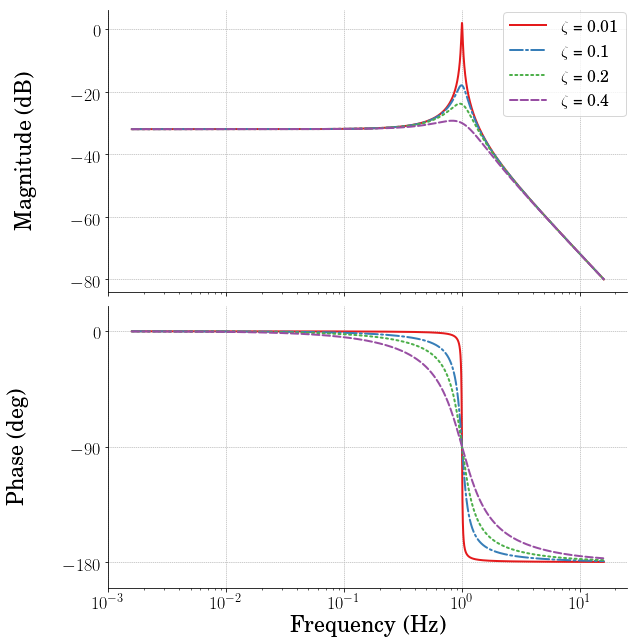

In [12]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

plt.xlabel(r'Frequency (Hz)',family='Serif',fontsize=22,weight='bold',labelpad=5)

# Magnitude plot
ax1.set_ylabel(r'Magnitude (dB)',family='Serif',fontsize=22,weight='bold',labelpad=35)
ax1.semilogx(frequency_Hz[:,0], mag_dB[:,0], linewidth=2, label=r'$\zeta$ = 0.01')
ax1.semilogx(frequency_Hz[:,1], mag_dB[:,1], linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.1')
ax1.semilogx(frequency_Hz[:,2], mag_dB[:,2], linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
ax1.semilogx(frequency_Hz[:,3], mag_dB[:,3], linewidth=2, linestyle = '--',label=r'$\zeta$ = 0.4')

ax1.leg = ax1.legend(loc='upper right', fancybox=True)
ltext  = ax1.leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# Phase plot 
ax2.set_ylabel(r'Phase (deg)',family='Serif',fontsize=22,weight='bold',labelpad=35)

ax2.semilogx(frequency_Hz[:,0], phase[:,0], linewidth=2, label=r'$\zeta$ = 0.01')
ax2.semilogx(frequency_Hz[:,1], phase[:,1], linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.1')
ax2.semilogx(frequency_Hz[:,2], phase[:,2], linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
ax2.semilogx(frequency_Hz[:,3], phase[:,3], linewidth=2, linestyle = '--',label=r'$\zeta$ = 0.4')

ax2.set_ylim(-200.0, 20.0)
ax2.set_yticks([0, -90, -180])

# Uncomment below to place a legend on the lower subplot too
# ax2.leg = ax2.legend(loc='upper right', fancybox=True)
# ltext  = ax2.leg.get_texts()
# plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MassSpring_SeismicTF.pdf',dpi=300)

fig.set_size_inches(9,9) # Resize the figure for better display in the notebook

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [13]:
# This cell will just improve the styling of the notebook
# You can ignore it, if you are okay with the default sytling
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))